# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [2]:
wisconsin_dataFrame = pd.read_csv('breast-cancer-wisconsin-data.csv') 
wisconsin_dataFrame.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
wisconsin_dataFrame = wisconsin_dataFrame.drop('ID',axis=True)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [5]:
wisconsin_dataFrame.shape

(699, 10)

In [6]:
wisconsin_dataFrame.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [7]:
wisconsin_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


>  ### As Mentioned above all columns have numeric values but "Bare Nuclei" is of object type. We have to do further analysis on it.

In [8]:
wisconsin_dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [9]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

In [10]:
temp = pd.DataFrame(wisconsin_dataFrame['Bare Nuclei'].str.isdigit())
wisconsin_dataFrame_missing = wisconsin_dataFrame[temp['Bare Nuclei']==False]
wisconsin_dataFrame_missing

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [11]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


### We can see '?' values in 'Bare Nuclei' on 16 rows due to this it is of object values

In [12]:
wisconsin_dataFrame_missing['Bare Nuclei'].shape

(16,)

In [13]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [14]:
wisconsin_dataFrame = wisconsin_dataFrame.replace('?',np.nan)

In [15]:
wisconsin_dataFrame = wisconsin_dataFrame.apply(lambda x: x.fillna(x.median()),axis=0)

In [16]:
wisconsin_dataFrame['Bare Nuclei'] = wisconsin_dataFrame['Bare Nuclei'].astype('int64')

In [17]:
wisconsin_dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10)
memory usage: 54.7 KB


In [18]:
wisconsin_dataFrame.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


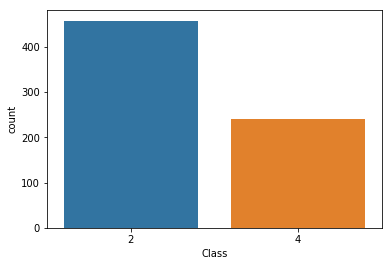

In [19]:
sns.countplot(x='Class', data=wisconsin_dataFrame)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [20]:
# Check for correlation of variable
wisconsin_dataFrame_corr = wisconsin_dataFrame.corr()
wisconsin_dataFrame_corr

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ClumpThickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Normal Nucleoli,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Bland Chromatin,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


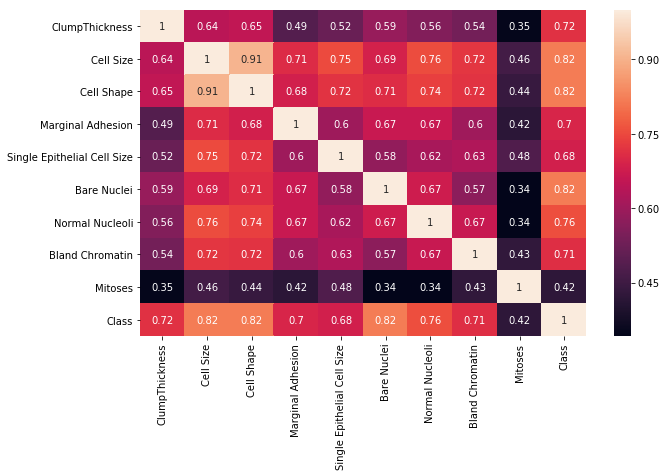

In [21]:
plt.figure(figsize=(10,6))
sns.heatmap(wisconsin_dataFrame_corr, annot=True)

In [22]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [23]:
#Let us check for pair plots

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


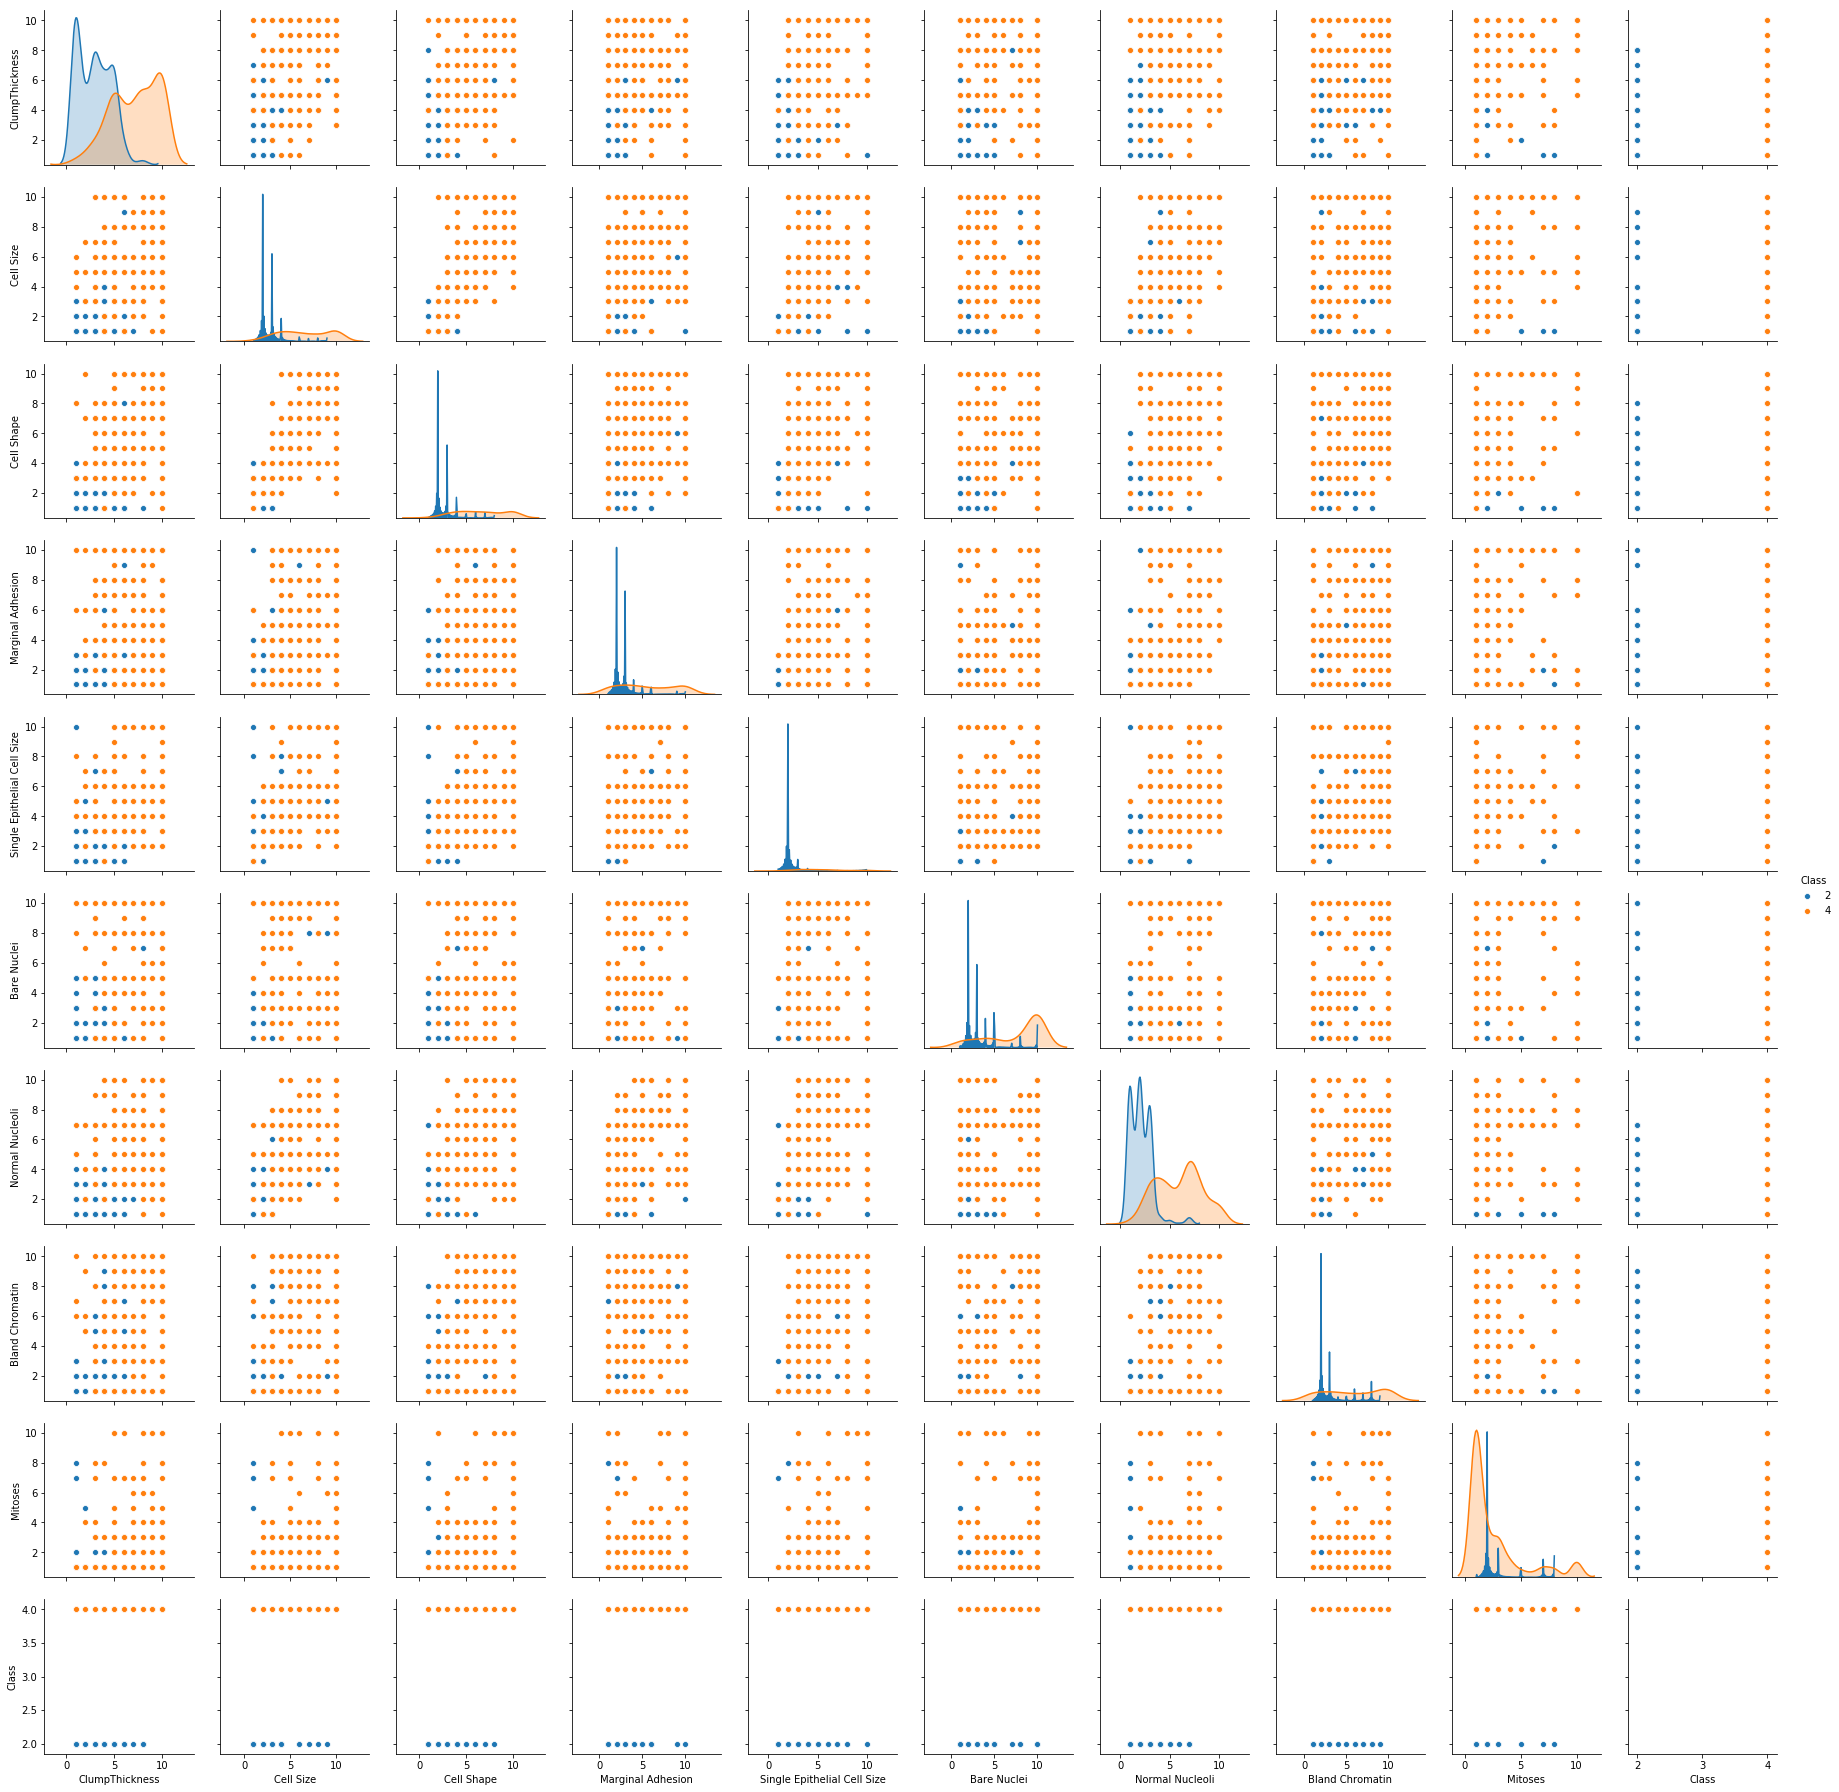

In [24]:
sns.pairplot(wisconsin_dataFrame , hue='Class' , diag_kind = 'kde')

## Blue benign (2), Orange malignant (4)

#### In most of the cases malignant has a wider distribution and benign has a tighter distribution

In [25]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [26]:
# We could see most of the outliers are now removed.

In [27]:
wisconsin_dataFrame_X = wisconsin_dataFrame.drop('Class',axis=True)
wisconsin_dataFrame_y = wisconsin_dataFrame['Class']

In [28]:
wisconsin_dataFrame_X.describe().T

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0


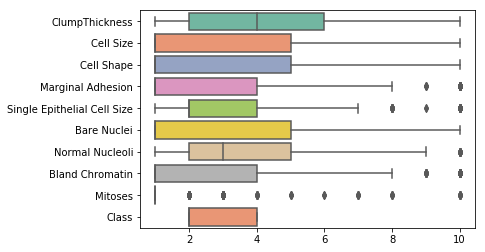

In [29]:
sns.boxplot(data=wisconsin_dataFrame, orient="h", palette="Set2")

In [30]:
#wisconsin_dataFrame_outliers = wisconsin_dataFrame.drop('Class',axis=True)
#Q3 = wisconsin_dataFrame_outliers.quantile(0.75)
#Q1 = wisconsin_dataFrame_outliers.quantile(0.25)
#wisconsin_dataFrame_outliers_iqr = Q3 - Q1
#mini = Q1 - 1.5*wisconsin_dataFrame_outliers_iqr
#maxi = Q3 + 1.5*wisconsin_dataFrame_outliers_iqr
#wisconsin_dataFrame_outliers_iqr

In [31]:
pd.crosstab(wisconsin_dataFrame['Marginal Adhesion'],wisconsin_dataFrame['Class'])

Class,2,4
Marginal Adhesion,,
1,375,32
2,37,21
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [32]:
pd.crosstab(wisconsin_dataFrame['Mitoses'],wisconsin_dataFrame['Class'])

Class,2,4
Mitoses,,
1,445,134
2,8,27
3,2,31
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [33]:
pd.crosstab(wisconsin_dataFrame['Bland Chromatin'],wisconsin_dataFrame['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [34]:
wisconsin_dataFrame['Bland Chromatin'] = np.where(wisconsin_dataFrame['Bland Chromatin'] > 4, 4,wisconsin_dataFrame['Bland Chromatin'])


In [35]:
pd.crosstab(wisconsin_dataFrame['Bland Chromatin'],wisconsin_dataFrame['Class'])

Class,2,4
Bland Chromatin,,
1,402,41
2,30,6
3,12,32
4,14,162


In [36]:
def crossTab(x,y):
    print('\n Column : %s \n'%(x.name))
    print(pd.crosstab(x,y))

In [37]:
crossTab(wisconsin_dataFrame['Single Epithelial Cell Size'],wisconsin_dataFrame['Class'])
crossTab(wisconsin_dataFrame['Mitoses'],wisconsin_dataFrame['Class'])


 Column : Single Epithelial Cell Size 

Class                          2   4
Single Epithelial Cell Size         
1                             46   1
2                            363  23
3                             29  43
4                              7  41
5                              5  34
6                              2  39
7                              3   9
8                              2  19
9                              0   2
10                             1  30

 Column : Mitoses 

Class      2    4
Mitoses          
1        445  134
2          8   27
3          2   31
4          0   12
5          1    5
6          0    3
7          1    8
8          1    7
10         0   14


In [38]:
wisconsin_dataFrame['Marginal Adhesion'] = np.where(wisconsin_dataFrame['Marginal Adhesion'] > 4, 4,wisconsin_dataFrame['Marginal Adhesion'])
wisconsin_dataFrame['Mitoses'] = np.where(wisconsin_dataFrame['Mitoses'] > 4 , 4, wisconsin_dataFrame['Mitoses'])
wisconsin_dataFrame['Single Epithelial Cell Size'] = np.where(wisconsin_dataFrame['Single Epithelial Cell Size'] > 4 , 4, wisconsin_dataFrame['Single Epithelial Cell Size'])

In [39]:
crossTab(wisconsin_dataFrame['Single Epithelial Cell Size'],wisconsin_dataFrame['Class'])
crossTab(wisconsin_dataFrame['Mitoses'],wisconsin_dataFrame['Class'])


 Column : Single Epithelial Cell Size 

Class                          2    4
Single Epithelial Cell Size          
1                             46    1
2                            363   23
3                             29   43
4                             20  174

 Column : Mitoses 

Class      2    4
Mitoses          
1        445  134
2          8   27
3          2   31
4          3   49


# Q6 Create a covariance matrix for identifying Principal components

In [56]:
# PCA
# Step 1 - Create covariance matrix
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
wisconsin_dataFrame_X_std = sc.fit_transform(wisconsin_dataFrame_X)  # scale training and test data independently to prevent data leaks

cov_matrix = np.cov(wisconsin_dataFrame_X_std.T)
cov_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[1.00143266, 0.64583645, 0.65552689, 0.48705303, 0.52256381,
        0.5908535 , 0.5592282 , 0.53660222, 0.35053534],
       [0.64583645, 1.00143266, 0.90818117, 0.70659267, 0.75287621,
        0.68765657, 0.75680368, 0.72390044, 0.4593503 ],
       [0.65552689, 0.90818117, 1.00143266, 0.68405782, 0.72069948,
        0.70848734, 0.73700282, 0.72047704, 0.43953974],
       [0.48705303, 0.70659267, 0.68405782, 1.00143266, 0.60045809,
        0.66792658, 0.66767051, 0.60421681, 0.41823111],
       [0.52256381, 0.75287621, 0.72069948, 0.60045809, 1.00143266,
        0.5845377 , 0.61698451, 0.62978166, 0.47978787],
       [0.5908535 , 0.68765657, 0.70848734, 0.66792658, 0.5845377 ,
        1.00143266, 0.67518063, 0.5756016 , 0.34288766],
       [0.5592282 , 0.75680368, 0.73700282, 0.66767051, 0.61698451,
        0.67518063, 1.00143266, 0.66683179, 0.34466258],
       [0.53660222, 0.72390044, 0.72047704, 0.60421681, 0.62978166,
        0.5756016 , 0.66683179, 1.00143266, 0.42894941],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [58]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.30280515  0.14602888 -0.86221719  0.0014072  -0.08821658  0.07192848
   0.24081701  0.26946934 -0.00131277]
 [-0.38119012  0.04956364  0.01909154  0.73568065  0.2026394  -0.13735749
  -0.44088652  0.1000979   0.21521315]
 [-0.37757351  0.08526953 -0.0345843  -0.66537497  0.17515522 -0.10469081
  -0.58600968  0.03200191  0.14204379]
 [-0.33282286  0.04471887  0.42144828 -0.04671812 -0.4703171   0.03462797
   0.11866965  0.68083355 -0.0861038 ]
 [-0.33639134 -0.16403795  0.11010437 -0.06786939  0.37332927 -0.68258246
   0.45057208 -0.03559797 -0.18337725]
 [-0.33349748  0.2477099  -0.00367104  0.07339423 -0.5431767  -0.1275059
  -0.10299896 -0.57486596 -0.41187463]
 [-0.3459564   0.22994199  0.19744944 -0.05881119 -0.00698988  0.25519148
   0.40975993 -0.31459721  0.67301535]
 [-0.33584019 -0.02502678  0.13164974  0.01889835  0.45537199  0.63180293
   0.08247514 -0.03841564 -0.50406321]
 [-0.22981766 -0.90839421 -0.09459348 -0.0075291  -0.23968608  0.1316273
  -0.0

# Q8 Find variance and cumulative variance by each eigen vector

In [59]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Variance ",var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Variance  [65.44570379762203, 8.608589755529701, 5.986995473919927, 5.1748700418633105, 4.227474060797515, 3.373565908122141, 3.2852348730473824, 2.910658031149293, 0.9869080579486803]
Cumulative Variance Explained [ 65.4457038   74.05429355  80.04128903  85.21615907  89.44363313
  92.81719904  96.10243391  99.01309194 100.        ]


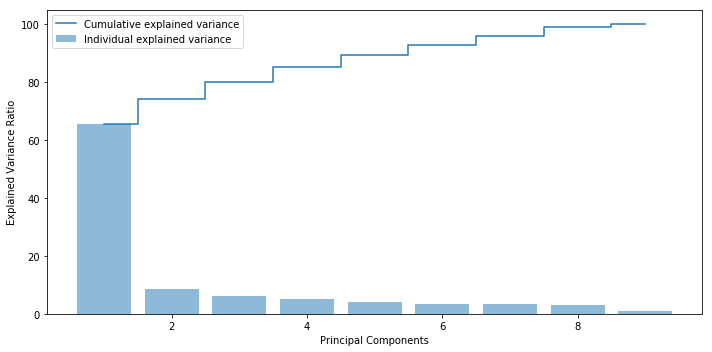

In [52]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [60]:
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]


# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()
eig_pairs.reverse()

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]

# Taking First 7 PCA 
P_reduce = np.array(eigvectors_sort[0:7]).transpose()

Proj_wisconsin_data = np.dot(wisconsin_dataFrame_X_std,P_reduce)

In [92]:
from sklearn.decomposition import PCA
pca = PCA()
wisconsin_dataFrame_X_PCA = pca.fit_transform(wisconsin_dataFrame_X_std)

pca_components_df = pd.DataFrame(pca.components_, columns=wisconsin_dataFrame_X.columns)
pca_components_df

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.302805,0.381190,0.377574,0.332823,0.336391,0.333497,0.345956,0.335840,0.229818
1,-0.146029,-0.049564,-0.085270,-0.044719,0.164038,-0.247710,-0.229942,0.025027,0.908394
2,-0.862217,0.019092,-0.034584,0.421448,0.110104,-0.003671,0.197449,0.131650,-0.094593
3,-0.088217,0.202639,0.175155,-0.470317,0.373329,-0.543177,-0.006990,0.455372,-0.239686
4,-0.071928,0.137357,0.104691,-0.034628,0.682582,0.127506,-0.255191,-0.631803,-0.131627
5,0.269469,0.100098,0.032002,0.680834,-0.035598,-0.574866,-0.314597,-0.038416,-0.143607
6,-0.001313,0.215213,0.142044,-0.086104,-0.183377,-0.411875,0.673015,-0.504063,0.125674
7,0.240817,-0.440887,-0.586010,0.118670,0.450572,-0.102999,0.409760,0.082475,-0.042510
8,0.001407,0.735681,-0.665375,-0.046718,-0.067869,0.073394,-0.058811,0.018898,-0.007529


In [72]:
wisconsin_dataFrame_X_PCA.shape

(699, 9)

In [74]:
Proj_wisconsin_pca_df = pd.DataFrame(wisconsin_dataFrame_X_PCA)
Proj_wisconsin_pca_df.shape

(699, 9)

# Q10 Find correlation between components and features

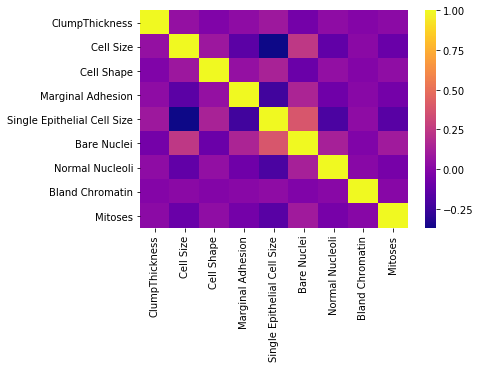

In [95]:
sns.heatmap(pca_components_df.corr(), cmap='plasma')

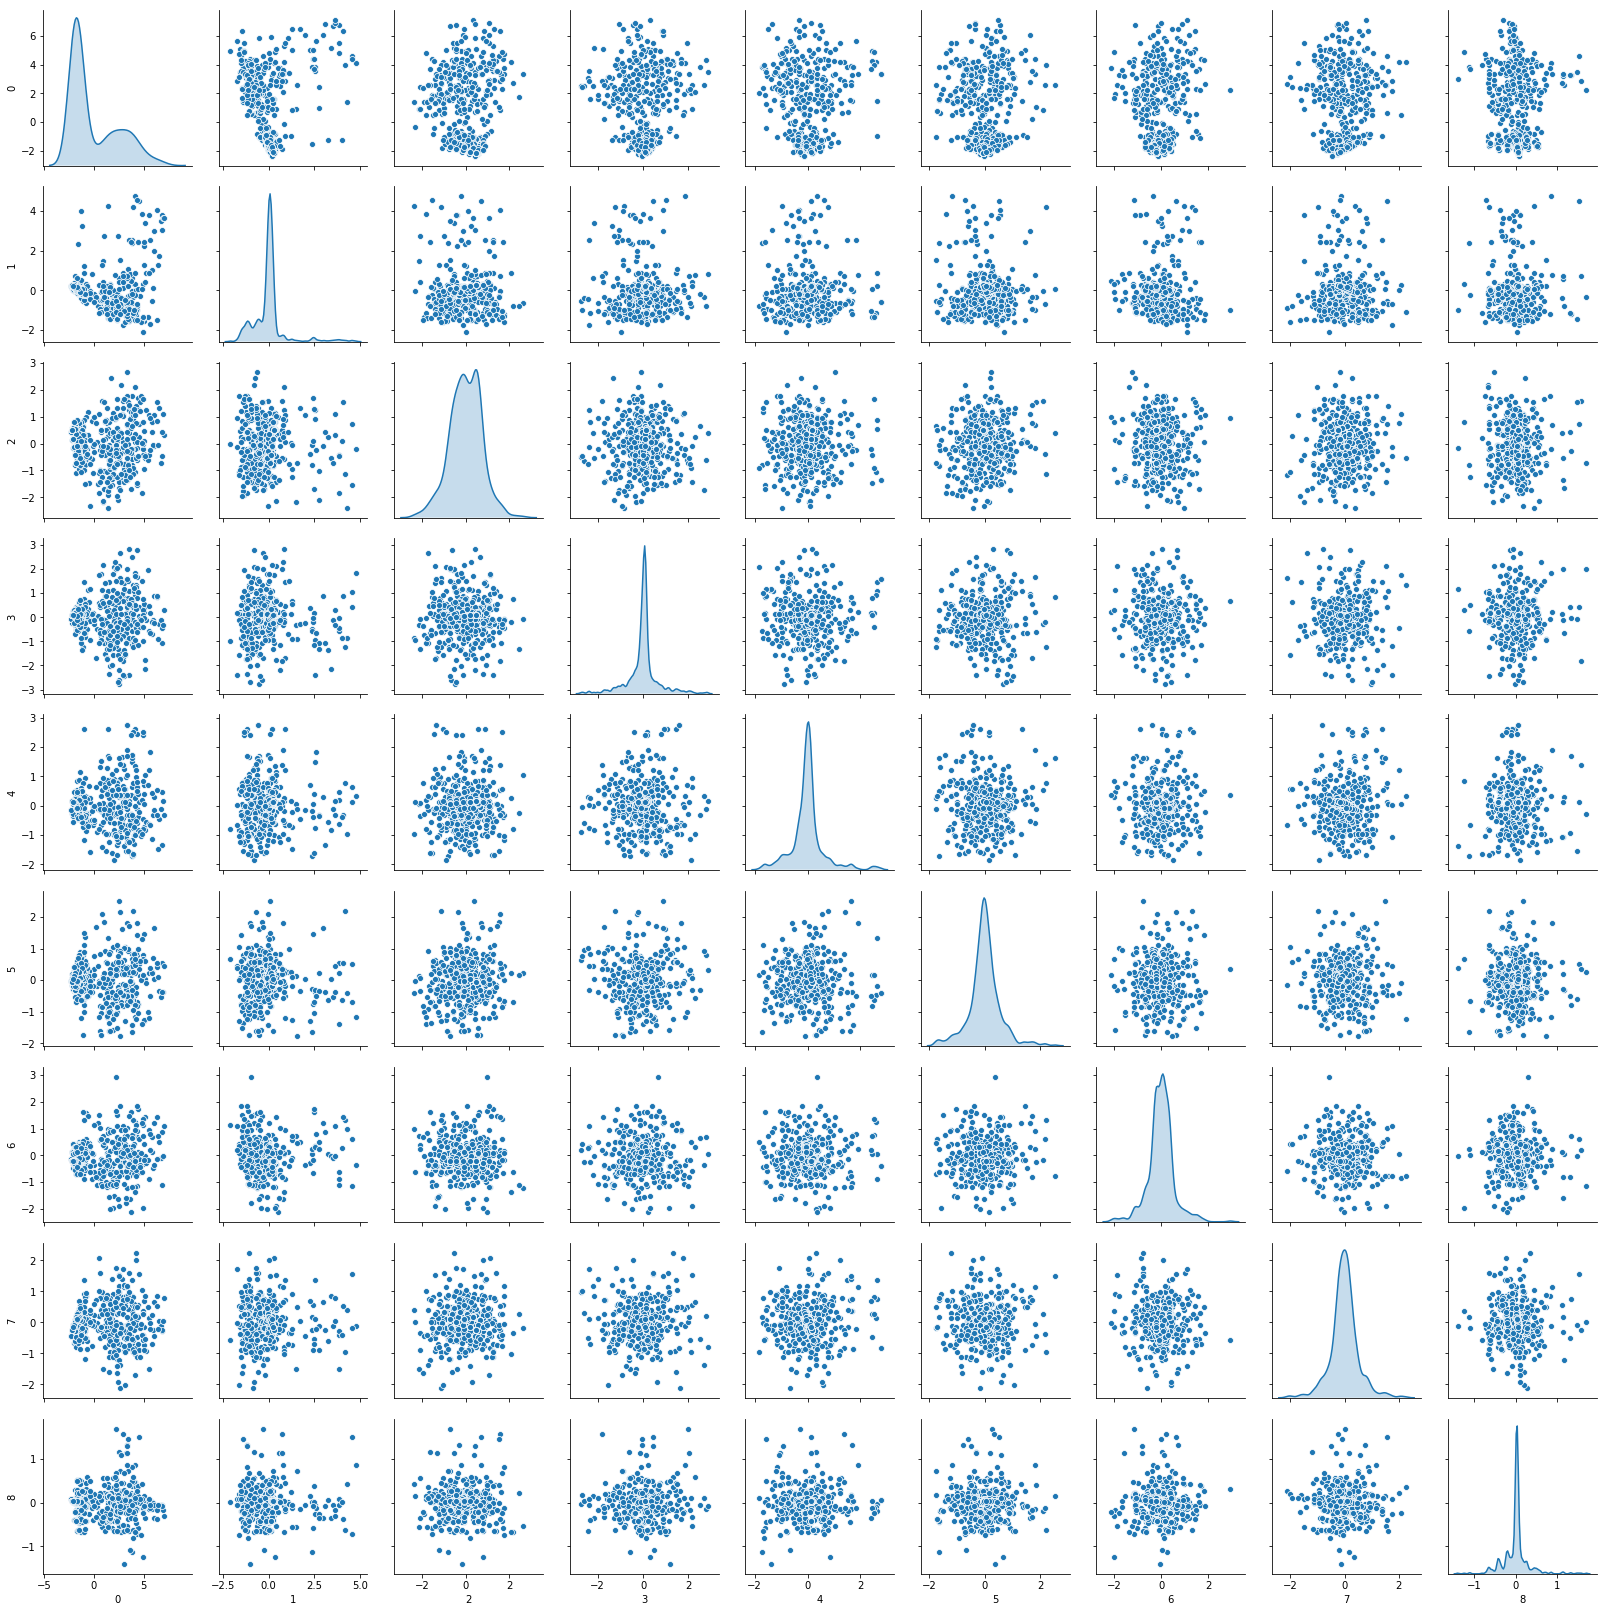

In [76]:
sns.pairplot(Proj_wisconsin_pca_df , diag_kind = 'kde')

# Content Based Recommendation System - Optional ( Q11 - Q18 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16  Create cosine similarity matrix

# Q17  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q18 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q19 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [80]:
ratings_data = pd.read_csv("jokes.csv")  
ratings_data.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q20 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [81]:
ratings_data.shape

(24983, 101)

In [82]:
ratings_data = ratings_data.drop(columns='NumJokes')
ratings = ratings_data.iloc[0:200,0:101]

In [83]:
ratings.shape

(200, 100)

# Q21 Change the column indices from 0 to 99

In [84]:
value = np.arange(0,100)

col= ratings.columns

col_nm = dict(zip(col,value))

ratings.rename(columns  = col_nm, inplace = True)

ratings.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
            68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
            85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
           dtype='int64')

# Q22 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [85]:
ratings.replace(99.00,0,inplace=True)

# Q23 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [87]:
standardScaler = StandardScaler()
ratings_diff = standardScaler.fit_transform(ratings)
ratings_diff.shape

(200, 100)

### Popularity based recommendation system

# Q24  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [88]:
ratings_diff_df = pd.DataFrame(ratings_diff)

ratings_diff_df.mean().nlargest(10)

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64